In [1]:
# Import libraries to make our lives easier

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import ngrams
import nltk
from nltk import sentiment
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import re
import random
from collections import defaultdict

sns.set(context='talk', style='ticks')


%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Use pandas to import our text data. We will manually set this to be read as ASCII and split each line of lyrics into seperate rows. 
# Save the resulting dataframe into MTS for Megan Thee Stallion

mts = pd.DataFrame({'lyrics': io.open('megan.txt', 'r', encoding='ascii', errors='ignore').read().split('\n\n')})

In [3]:
# View first 5 rows of lyrics
# The first song is WAP!

mts.head()

,lyrics
0,"Gobble me, swallow me, drip down the side of m..."
1,"Real hot girl shit\nYeah, I'm in my bag, but I..."
2,Handle me? (Huh) Who gon' handle me? (Who?)\nT...
3,"I'm that bitch (Yeah)\nBeen that bitch, still ..."
4,I love niggas with conversation that find the ...


In [4]:
# The last song in our dataset is Outside, from Meg's new album
mts.tail()

,lyrics
53,"He like it when I work that, twerk that, serve..."
54,"Ayy, when it come to body, nobody bodyin' me\n..."
55,"Okay, the hate turn me to a monster, so I gues..."
56,"Just come get all your stuff, I guess my love ..."
57,"\nI got every purse, every color, shoutout to ..."


In [5]:
# Megan's verse in WAP

mts.loc[1, 'lyrics']

'Real hot girl shit\nYeah, I\'m in my bag, but I\'m in his too\nAnd that\'s why every time you see me, I got some new shoes\nAh, mwah, ayy, look\nLil Ju made this beat\nBitch, I\'m a star, got these niggas wishin\'\nHe say he hungry, this pussy the kitchen\nYeah, that\'s my dawg, he gon\' sit down and listen\nCall him a trick and he don\'t get off\', hold up\nBitch, I\'m a star, got these niggas wishin\'\nHe say he hungry, this pussy the kitchen\nYeah, that\'s my dawg, he gon\' sit down and listen\nCall him a trick and he don\'t get offended\nHe know he giving his money to Megan\nHe know it\'s very expensive to date me\nTold him go put my name on that account\nBecause when I need money, I ain\'t tryna, hold up\nHe know he giving his money to Megan\nHe know it\'s very expensive to date me\nTold him go put my name on that account\nBecause when I need money, I ain\'t tryna wait\nI can\'t be fucked with, no\nHo, you can\'t touch this, ayy\nBitch, I do rich shit, huh\nMy money thick thick, 

In [6]:
# Freak Nasty

mts.loc[10, 'lyrics']

'Im running through your nigga house like a Tomb Raider\nYou got a pass around nigga, he a hot potato\nI told him, Eat it or get out, thats your ultimatum\nBut stop licking my pussy hard, that shit aggravating\nUh, he aint mine, I just let him eat me out from time to time\nCall that pussy pootie tang, cause I got the runny kind\nHe cant compare me to none of these bitches\nI got that Beyonc, that Dreamgirl, that Listen\nFreak, freak, freak nasty\nGo a couple rounds, leave that dick up in a casket\nI aint wanna take the nigga from you, it just happened\nYou know I aint cum boy if you had to ask me\nFreak, freak, freak nasty\nLick on my hand then I put it in his pants (Ahh, ahh, ahh)\nGet to playing with that cock and make that motherfucker bam\nAnd I walk and I talk like a pimp, cause I am\nParlez-vous franais? Tell my pussy "hey" (Ooh la la)\nFancy top, give me head in a beret (Ooh la la)\nStormy Daniels, head from the head of state\nTwee lee lee, make it clap on his face, ayy\nFreak, 

In [14]:
# Split lyrics into characters, words, lines
# Calculate the number of unique words
# Calculate the lexical density of each song

mts['characters'] = mts.lyrics.str.len()
mts['words'] = mts.lyrics.str.split().str.len()
mts['lines'] = mts.lyrics.str.split('\n').str.len()
mts['uniq_words'] = mts.lyrics.apply(lambda x: len(set(x.split())))
mts['lexical_density'] = mts['uniq_words'] / mts['words']

In [15]:
mts.head()

,lyrics,characters,words,lines,uniq_words,lexical_density
0,"Gobble me, swallow me, drip down the side of m...",1274,261,24,165,0.632184
1,"Real hot girl shit\nYeah, I'm in my bag, but I...",2902,611,85,187,0.306056
2,Handle me? (Huh) Who gon' handle me? (Who?)\nT...,1394,286,24,158,0.552448
3,"I'm that bitch (Yeah)\nBeen that bitch, still ...",837,139,22,97,0.697842
4,I love niggas with conversation that find the ...,1127,229,20,150,0.655022


## Exploring lyrics

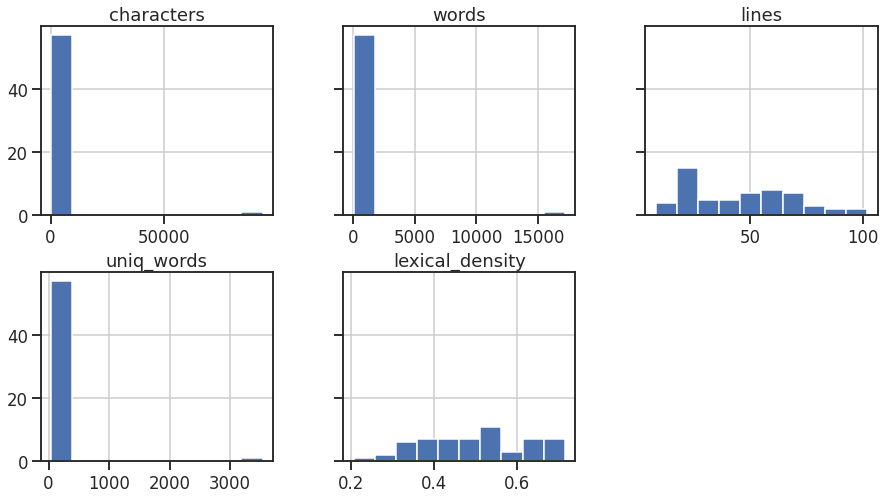

In [16]:
mts.hist(sharey=True, layout=(2, 3), figsize=(15, 8));

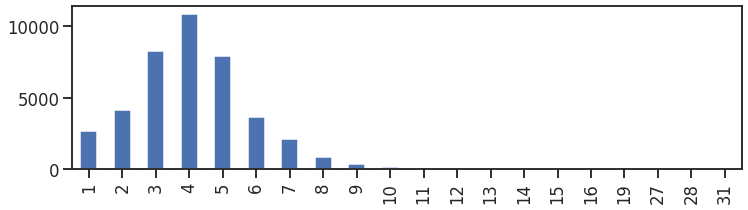

In [17]:
# Word length distribution
# Unsurprising for lyrics, most words are 4 letters lonng
pd.Series(len(x) for x in ' '.join(mts.lyrics).split()).value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

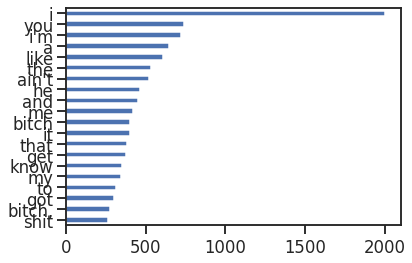

In [18]:
# Top words

pd.Series(' '.join(mts.lyrics).lower().split()).value_counts()[:20][::-1].plot(kind='barh')

In [22]:
# What are stopwords?
nltk.download('stopwords')


all_stopwords = stopwords.words('english')
all_stopwords.remove('i')
all_stopwords.remove('me')

text_tokens = word_tokenize(mts.lyrics[0])
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]

print(tokens_without_sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: ignored

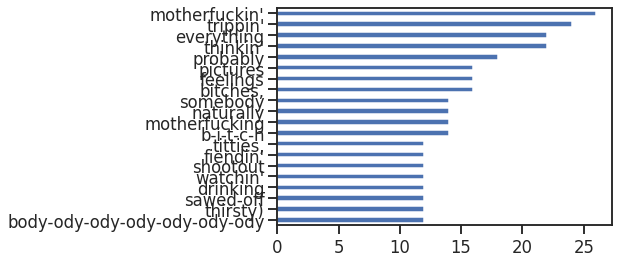

In [81]:
pd.Series([w for w in ' '.join(mts.lyrics).lower().split() if len(w) > 7]).value_counts()[:20][::-1].plot(kind='barh')

In [82]:
# Create utility function to create n-grams

def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

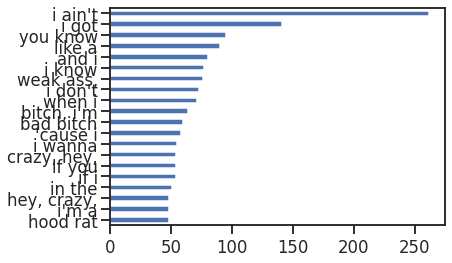

In [83]:
# Top bi-grams
pd.Series(get_ngrams_from_series(mts.lyrics, 2)).value_counts()[:20][::-1].plot(kind='barh')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


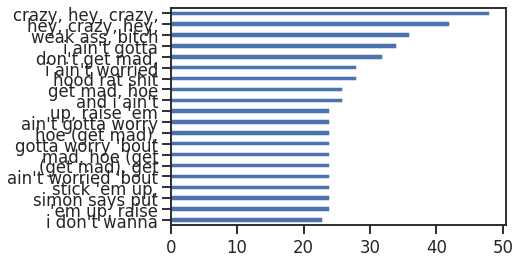

In [84]:
# Top Tri-grams
pd.Series(get_ngrams_from_series(mts.lyrics, 3)).value_counts()[:20][::-1].plot(kind='barh')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


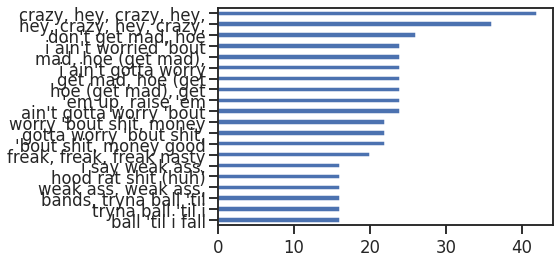

In [85]:
# Top four-grams
pd.Series(get_ngrams_from_series(mts.lyrics, 4)).value_counts()[:20][::-1].plot(kind='barh')

## Sentiment Analysis

# **Warning**

---
Sentiment analysis is an incredibly biased way to meaure a word's meaning. We have to consider that these systems were created by tasking expert linguists in creating word embeddings. Word embeddings help us quantitatively analyze text data by creating numberiocal relationships between words, for example King and Queen.

Because these embeddings were created with the leadership of human language annotators we have to consider the demographics of these language experts and the institutions that have funded this work. 


 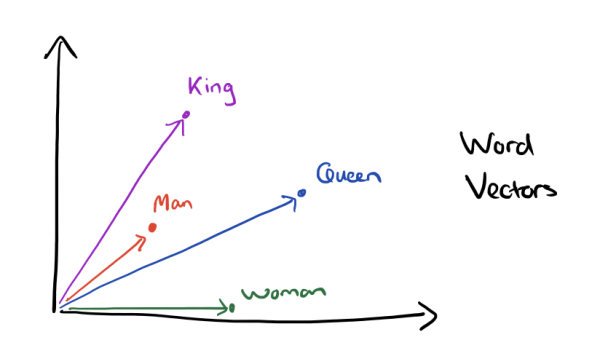


In [23]:
# Download sentiment lexiconm

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
# Load Sentiment Analyzer 

senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

In [88]:
# Sentiment of WAP

senti_analyze.polarity_scores(mts.lyrics[0])

{'compound': -0.9042, 'neg': 0.099, 'neu': 0.835, 'pos': 0.066}

In [89]:
# Let's see those again
mts.loc[0, 'lyrics']

'Gobble me, swallow me, drip down the side of me (Yeah)\nQuick, jump out \'fore you let it get inside of me (Yeah)\nI tell him where to put it, never tell him where I\'m \'bout to be (Huh)\nI\'ll run down on him \'fore I have a nigga runnin\' me (Pow, pow, pow)\nTalk your shit, bite your lip (Yeah)\nAsk for a car while you ride that dick (While you ride that dick)\nYou really ain\'t never gotta fuck him for a thang (Yeah)\nHe already made his mind up \'fore he came (Ayy, ah)\nNow get your boots and your coat for this wet-ass pussy (Ah, ah, ah)\nHe bought a phone just for pictures of this wet-ass pussy (Click, click, click)\nPaid my tuition just to kiss me on this wet-ass pussy (Mwah, mwah, mwah)\nNow make it rain if you wanna see some wet-ass pussy (Yeah, yeah)\nYour honor, I\'m a freak bitch, handcuffs, leashes\nSwitch my wig, make him feel like he cheatin\'\nPut him on his knees, give him somethin\' to believe in\nNever lost a fight, but I\'m lookin\' for a beatin\' (Ah)\nIn the food

In [26]:
# Score the sentiment for each song

mts['sentiment_score'] = pd.DataFrame(mts.lyrics.apply(senti_analyze.polarity_scores).tolist())['compound']
mts['sentiment'] = pd.cut(mts['sentiment_score'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

In [25]:
# Okay so this thinks a LOT of Meg's lyrics have negative sentiment
mts.head()

,lyrics,characters,words,lines,uniq_words,lexical_density
0,"Gobble me, swallow me, drip down the side of m...",1274,261,24,165,0.632184
1,"Real hot girl shit\nYeah, I'm in my bag, but I...",2902,611,85,187,0.306056
2,Handle me? (Huh) Who gon' handle me? (Who?)\nT...,1394,286,24,158,0.552448
3,"I'm that bitch (Yeah)\nBeen that bitch, still ...",837,139,22,97,0.697842
4,I love niggas with conversation that find the ...,1127,229,20,150,0.655022


In [27]:
# At least there are some postive sentiment songs, the first few just happen to be negative 
mts

,lyrics,characters,words,lines,uniq_words,lexical_density,sentiment_score,sentiment
0,"Gobble me, swallow me, drip down the side of m...",1274,261,24,165,0.632184,-0.9042,negative
1,"Real hot girl shit\nYeah, I'm in my bag, but I...",2902,611,85,187,0.306056,-0.9996,negative
2,Handle me? (Huh) Who gon' handle me? (Who?)\nT...,1394,286,24,158,0.552448,-0.9900,negative
3,"I'm that bitch (Yeah)\nBeen that bitch, still ...",837,139,22,97,0.697842,-0.9957,negative
4,I love niggas with conversation that find the ...,1127,229,20,150,0.655022,-0.9710,negative
5,"Hot Girl Summer, I ain't fucking with no drama...",1135,219,16,118,0.538813,0.9160,positive
6,"\nBitch, I'm lit like a match, ooh\nAnd any ni...",1105,214,23,118,0.551402,-0.9926,negative
7,Why you wanna play with me? You know I'm undef...,779,166,12,99,0.596386,-0.9574,negative
8,I'd rather be your B-I-T-C-H (I'd rather keep ...,1944,387,32,126,0.325581,-0.5224,negative
9,"\nAyy, big ole freak, huh\nBig booty, big ole ...",3320,693,83,266,0.383838,0.9191,positive


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe46f968a90>]],
      dtype=object)

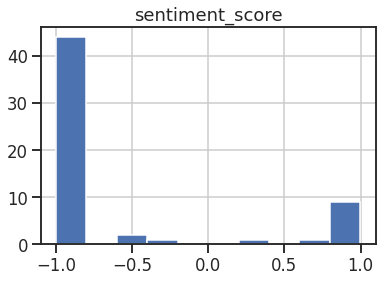

In [93]:
mts[['sentiment_score']].hist(bins=10)

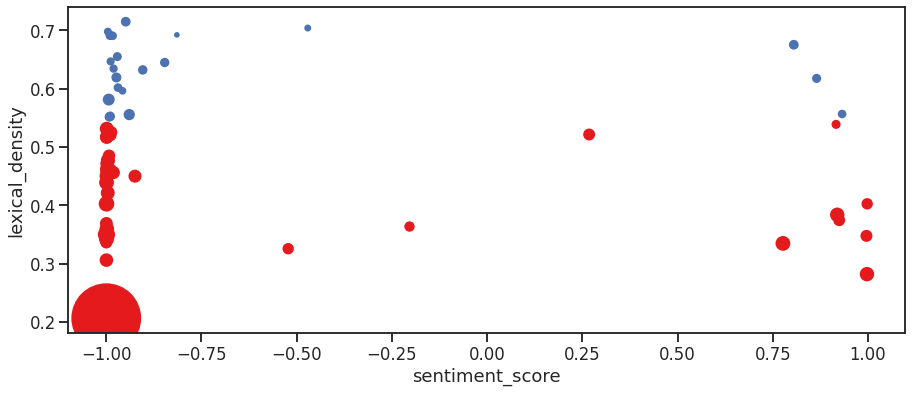

In [94]:
# Songs with lower lexical density tend to have lower sentiments

# Examples: WAB is repeats the same words a lot and is mostly derrogatory
# The sentiment analyzer could also view phrases like "I'm that bitch" as negative


mts.plot.scatter(x='sentiment_score', y='lexical_density', s=mts['characters']/20,
                c=np.where(mts['lexical_density'].le(0.55), '#e41a1c', '#4c72b0'),
                figsize=(15, 6))

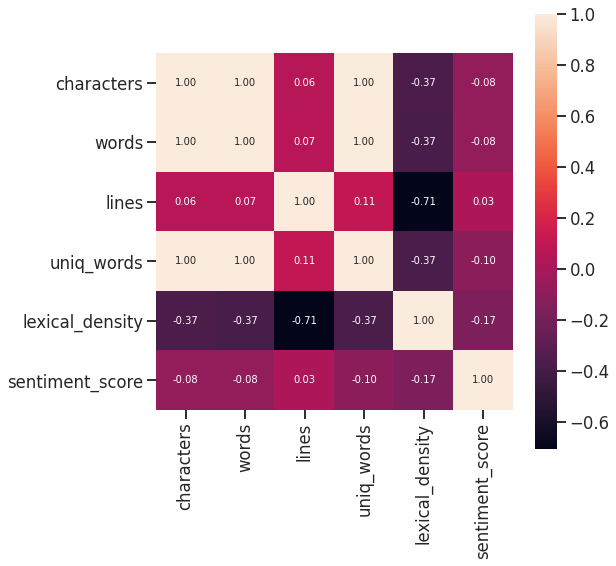

In [95]:
# This correlation plot shows the exact negative imapact lexical density has on sentiment. -0.29
# It makes logical sense that the number of characters, words, lines, and unique words are pretty correlated

#There is also a small negative correlation between sentiment and lexical density
# We can interpret this as the lower the lexical density, the more likely the sentiment is negative
corr = mts.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Topic Modeling

In [96]:
# Song themes via Simplistic topic modelling

no_topics = 5
no_features = 50
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(mts.lyrics)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

def get_topics(model, feature_names, no_topwords):
    for topic_id, topic in enumerate(model.components_):
        print('topic %d:' % (topic_id))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-no_topwords-1:-1]]))

s = pd.DataFrame(nmf.transform(tfidf)).idxmax(1)

In [97]:
# NMP topics
get_topics(nmf, tfidf_feature_names, 20)

topic 0:
ain like know don money shit got em say nigga bad bout let wanna cause fuck tryna ma want come
topic 1:
ah like yeah hey pussy freak hoes fuck mad ooh hot nigga make got look girl need cause let don
topic 2:
ass uh yeah huh shit ayy don nigga say make want ya shake dick niggas need got pussy real come
topic 3:
ayy tell shit huh freak niggas yeah bitches fuck wanna pussy need hey come cause make gon em good bout
topic 4:
ya baby ooh real gon need let know bitches make ain like huh come wanna tell got pussy fuck cause


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


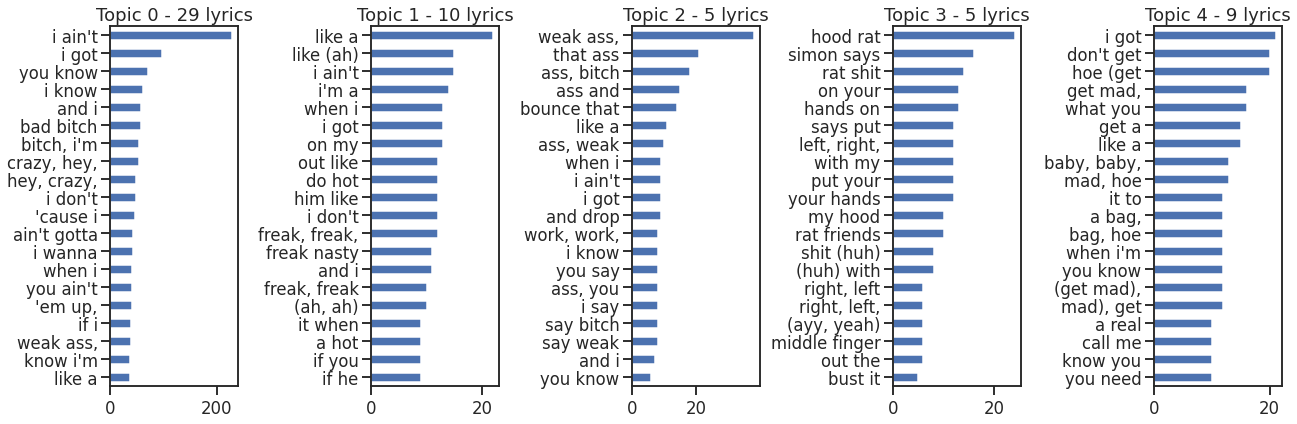

In [98]:
# Top Bi-grams from the topics

topics = set(s)
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(topics))
for i, v in enumerate(topics):
    dfsm = mts.loc[s.eq(v), 'lyrics']
    ngram = pd.Series(get_ngrams_from_series(dfsm, 2)).value_counts()[:20][::-1]
    ngram.plot(kind='barh', ax=axs[i], title='Topic {} - {} lyrics'.format(v, s.eq(v).sum()))
plt.tight_layout()
mts['topic'] = s.astype(str).radd('Topic ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


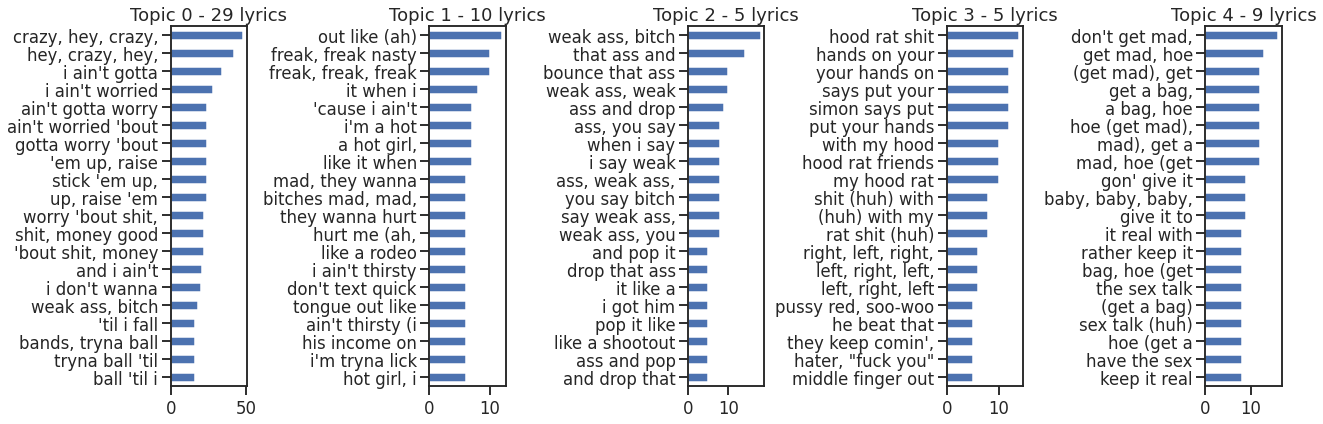

In [99]:
# Top Tri-grams from the topics

topics = set(s)
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(topics))
for i, v in enumerate(topics):
    dfsm = mts.loc[s.eq(v), 'lyrics']
    ngram = pd.Series(get_ngrams_from_series(dfsm, 3)).value_counts()[:20][::-1]
    ngram.plot(kind='barh', ax=axs[i], title='Topic {} - {} lyrics'.format(v, s.eq(v).sum()))
plt.tight_layout()
mts['topic'] = s.astype(str).radd('Topic ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


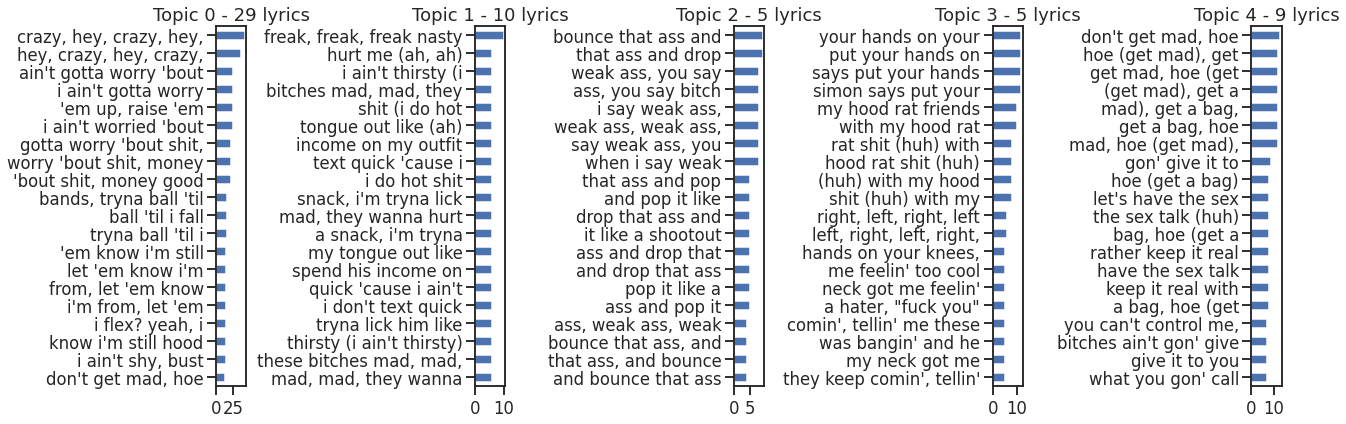

In [100]:
# Top Four-grams from the topics
topics = set(s)
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(topics))
for i, v in enumerate(topics):
    dfsm = mts.loc[s.eq(v), 'lyrics']
    ngram = pd.Series(get_ngrams_from_series(dfsm, 4)).value_counts()[:20][::-1]
    ngram.plot(kind='barh', ax=axs[i], title='Topic {} - {} lyrics'.format(v, s.eq(v).sum()))
plt.tight_layout()
mts['topic'] = s.astype(str).radd('Topic ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


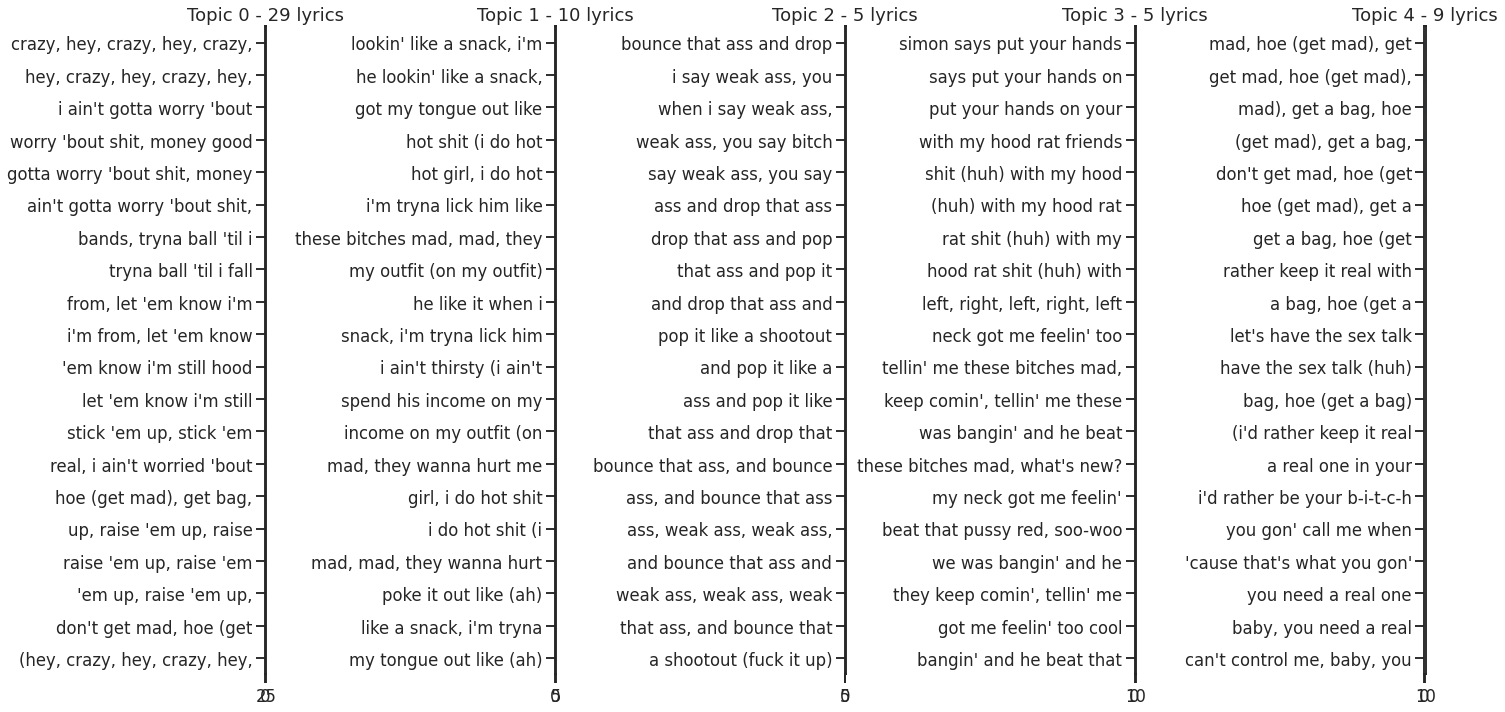

In [101]:
# Top Five-grams from the topics
topics = set(s)
fig, axs = plt.subplots(figsize=(20, 10), ncols=len(topics))
for i, v in enumerate(topics):
    dfsm = mts.loc[s.eq(v), 'lyrics']
    ngram = pd.Series(get_ngrams_from_series(dfsm, 5)).value_counts()[:20][::-1]
    ngram.plot(kind='barh', ax=axs[i], title='Topic {} - {} lyrics'.format(v, s.eq(v).sum()))
plt.tight_layout()
mts['topic'] = s.astype(str).radd('Topic ')

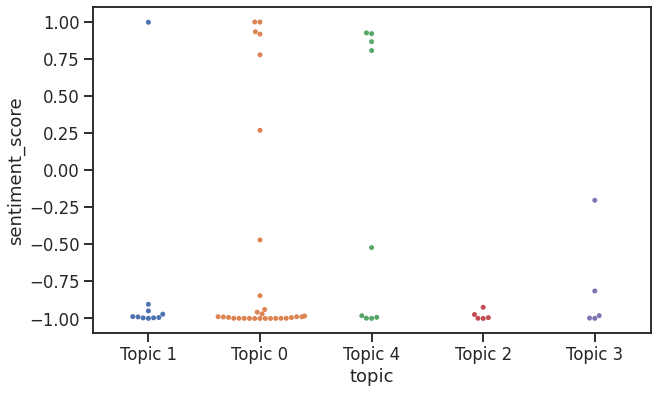

In [102]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.swarmplot(x='topic', y='sentiment_score', data=mts)

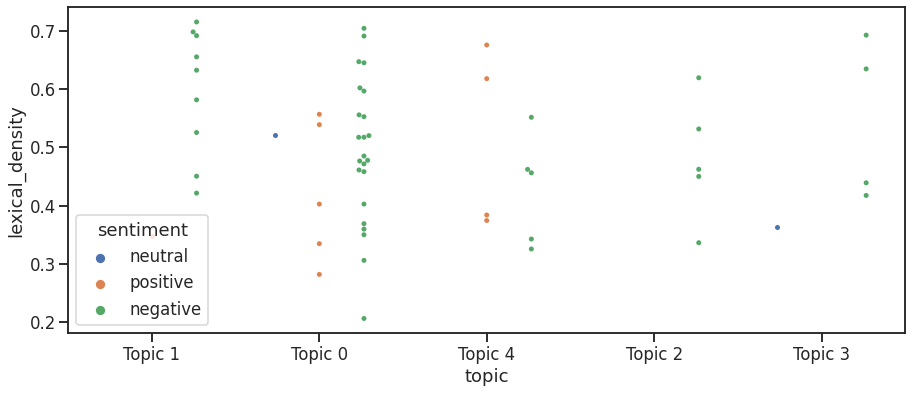

In [103]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='topic', y='lexical_density', hue='sentiment',
              hue_order=['neutral', 'positive', 'negative'], data=mts, dodge=True)

## Using ML to generate new Lyrics

In [28]:
# Machine generated lyrics using Markov

class MarkovRachaita:
    def __init__(self, corpus='', order=2, length=8):
        self.order = order
        self.length = length
        self.words = re.findall("[a-z']+", corpus.lower())
        self.states = defaultdict(list)

        for i in range(len(self.words) - self.order):
            self.states[tuple(self.words[i:i + self.order])].append(self.words[i + order])

    def gen_sentence(self, length=8, startswith=None):
        terms = None
        if startswith:
            start_seed = [x for x in self.states.keys() if startswith in x]
            if start_seed:
                terms = list(start_seed[0])
        if terms is None:
            start_seed = random.randint(0, len(self.words) - self.order)
            terms = self.words[start_seed:start_seed + self.order]

        for _ in range(length):
            terms.append(random.choice(self.states[tuple(terms[-self.order:])]))

        return ' '.join(terms)

    def gen_song(self, lines=10, length=8, length_range=None, startswith=None):
        song = []
        if startswith:
            song.append(self.gen_sentence(length=length, startswith=startswith))
            lines -= 1
        for _ in range(lines):
            sent_len = random.randint(*length_range) if length_range else length
            song.append(self.gen_sentence(length=sent_len))
        return '\n'.join(song)

In [29]:
megan_ai = MarkovRachaita(corpus=' '.join(mts.lyrics))
print(megan_ai.gen_song(lines=10, length_range=[5, 10]))

in section bands bring them girls over here
'bout these motherfucking haters not at all nine times
dumb but keep my cat up out ya mouth 'cause
fuckin' on megan it's driving his last
designer sheets hey hey how many plaques chose finna get
i want birkin finna found out that
more i don't wanna argue 'bout it baby i'm good
he doggin' it out like ah none of these dudes with
can't save you when there's money made i'm tryna
you raw doggin' with a horse he need it


In [30]:
print(megan_ai.gen_song(lines=10, length_range=[10, 20], startswith='hot'))

real hot girl i cry don't sing lullaby by by
ooh oh woah baby baby baby baby baby baby ooh oh woah baby baby baby baby baby baby
i know people city hating on me in that what the fuck
ten like i got him fallin' in love with your scary ass pig bitch your momma shouldn't had kick me while i'm
pussy aquafina make booty bigger ayy bitch i'm rich rich ri ri rich rich ri
brazy brazy mm mm that's super sad fuck it i got another bitch don't stop pop that cat mmm mmm
it he beggin' me he like baby hair i get up in that dress and
dick he deep in them covers this pussy so good that he
main nigga getting super jealous even know fellas i need range and i talk yeah i should i take yo' nigga
then my dms get to playing with that pussy pootie tang cause


In [31]:
print(megan_ai.gen_song(lines=5, length_range=[9, 10]))

to sleep no pajamas i will flip out in this rolls
am i lit bitch of course we never show together but
listen hey huh he tryna holler ain't looking stop shaking hand bro
last year huh bitch i don't wanna argue 'bout it baby i'm
i bitch that's all you can ooh i'm kickin' bitches spot


In [ ]:
# Your Turn to Experiment

# Create lyrics that start with "Friday"